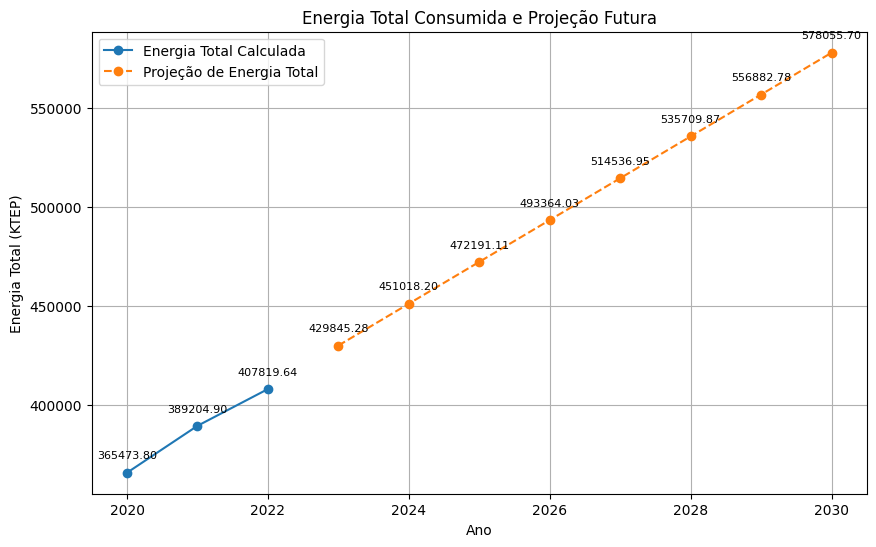

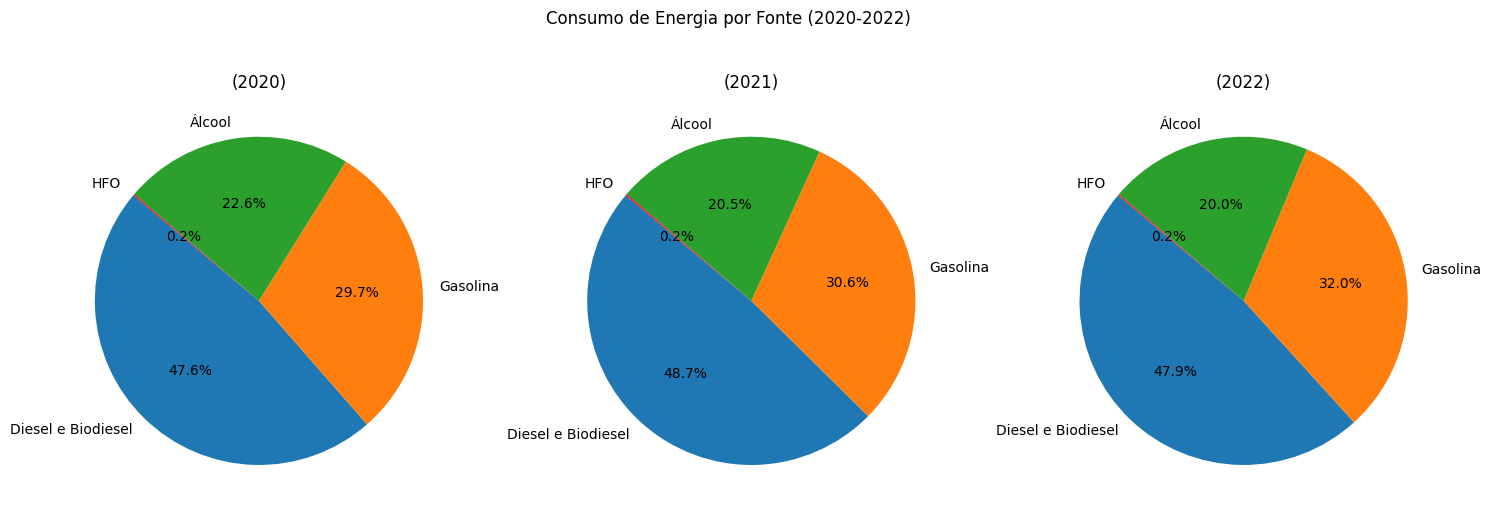

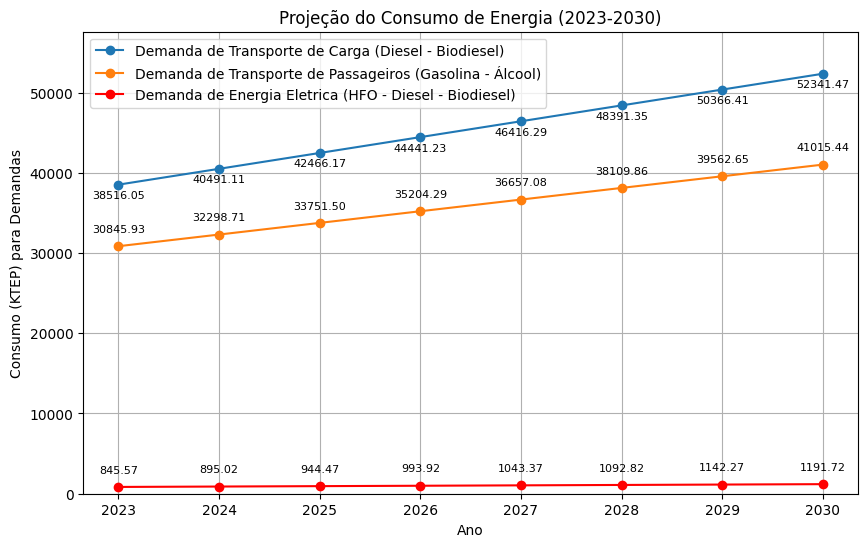

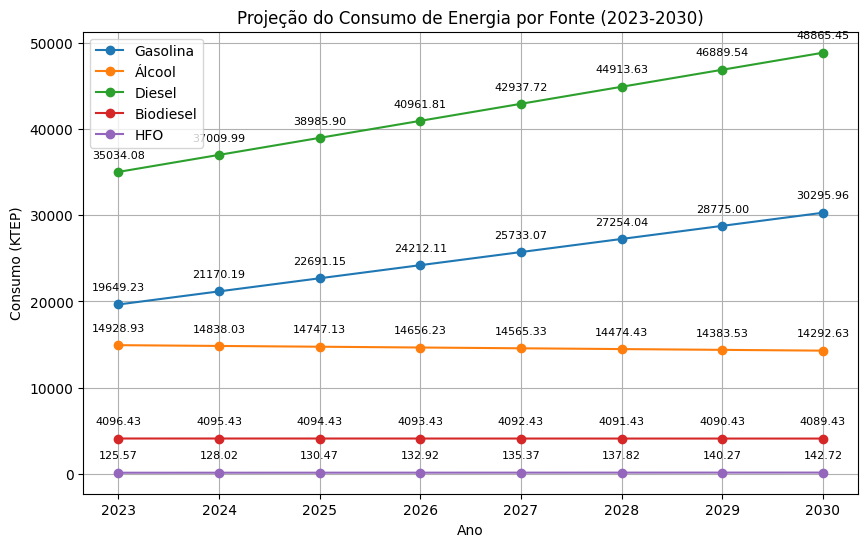

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Função para calcular a energia total
def calcular_energia_total(dem_tc2, dem_tp2, dem_el, dem_evp, dem_evc, n_tc, n_tp, n_el, n_td, nev):
    return (dem_tc2 / n_tc) + (dem_tp2 / n_tp) + (dem_el / (n_el * n_td) + (dem_evc/nev) + (dem_evp/nev))

# Dados fornecidos
anos = [2020, 2021, 2022]

diesel_and_bio_2020 = 33946.3 + 4007.2
diesel_and_bio_2021 = 37160.3 + 4282.9
diesel_and_bio_2022 = 38595.5 + 4005.2

diesel_and_bio_demEL_2020 = 591
diesel_and_bio_demEL_2021 = 602
diesel_and_bio_demEL_2022 = 685

gas_2020 = 20136.5
gas_2021 = 22100.3
gas_2022 = 24192.4

alcool_2020 = 15337.2
alcool_2021 = 14839.6
alcool_2022 = 15155.4

hfo_consume_2020 = 111.1
hfo_consume_2021 = 134.9
hfo_consume_2022 = 116

p = 0.25
q = 0.15
nev = 0.70

diesel_2020 = 33946.3
diesel_2021 = 37160.3
diesel_2022 = 38595.5

bio_2020 = 4007.2
bio_2021 = 4282.9
bio_2022 = 4005.2

# Dados para 2020
dem_tc_2020 = diesel_and_bio_2020
dem_tp_2020 = gas_2020 + alcool_2020
dem_el_2020 = hfo_consume_2020 + diesel_and_bio_demEL_2020

dem_tc2_2020 = dem_tc_2020 * (1 - q)
dem_tp2_2020 = dem_tp_2020 * (1 - p)

dev_evp_2020 = (p * dem_tp_2020)
dem_evc_2020 = (q * dem_tc_2020)

# Dados para 2021
dem_tc_2021 = diesel_and_bio_2021
dem_tp_2021 = gas_2021 + alcool_2021
dem_el_2021 = hfo_consume_2021 + diesel_and_bio_demEL_2021

dem_tc2_2021 = dem_tc_2021 * (1 - q)
dem_tp2_2021 = dem_tp_2021 * (1 - p)

dev_evp_2021 = (p * dem_tp_2021)
dem_evc_2021 = (q * dem_tc_2021)

# Dados para 2022
dem_tc_2022 = diesel_and_bio_2022
dem_tp_2022 = gas_2022 + alcool_2022
dem_el_2022 = hfo_consume_2022 + diesel_and_bio_demEL_2022

dem_tc2_2022 = dem_tc_2022 * (1 - q)
dem_tp2_2022 = dem_tp_2022 * (1 - p)

dev_evp_2022 = (p * dem_tp_2022)
dem_evc_2022 = (q * dem_tc_2022)

# Constantes fornecidas
n_tc = 0.20
n_tp = 0.15
n_el = 0.39
n_td = 0.30

# Cálculo da energia total para cada ano
energia_total_2020 = calcular_energia_total(dem_tc2_2020, dem_tp2_2020, dem_el_2020, dev_evp_2020, dem_evc_2020, n_tc, n_tp, n_el, n_td, nev)
energia_total_2021 = calcular_energia_total(dem_tc2_2021, dem_tp2_2021, dem_el_2021, dev_evp_2021, dem_evc_2021, n_tc, n_tp, n_el, n_td, nev)
energia_total_2022 = calcular_energia_total(dem_tc2_2022, dem_tp2_2022, dem_el_2022, dev_evp_2022, dem_evc_2022, n_tc, n_tp, n_el, n_td, nev)

energia_total = [energia_total_2020, energia_total_2021, energia_total_2022]

# Projeção para os anos de 2023 a 2030 usando regressão linear
anos_futuros = list(range(2023, 2031))
X = np.array(anos).reshape(-1, 1)
y = np.array(energia_total)
modelo = LinearRegression().fit(X, y)
projecao = modelo.predict(np.array(anos_futuros).reshape(-1, 1))

# Plotando o gráfico de energia total consumida e projeção futura
plt.figure(figsize=(10, 6))
plt.plot(anos, energia_total, 'o-', label='Energia Total Calculada')
plt.plot(anos_futuros, projecao, 'o--', label='Projeção de Energia Total')
for i, txt in enumerate(energia_total):
    plt.annotate(f'{txt:.2f}', (anos[i], energia_total[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
for i, txt in enumerate(projecao):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.xlabel('Ano')
plt.ylabel('Energia Total (KTEP)')
plt.title('Energia Total Consumida e Projeção Futura')
plt.legend()
plt.grid(True)
plt.show()

# Projeção para TC
y_diesel_bio = np.array([dem_tc2_2020, dem_tc2_2021, dem_tc2_2022])
modelo_diesel_bio = LinearRegression().fit(X, y_diesel_bio)
projecao_diesel_bio = modelo_diesel_bio.predict(np.array(anos_futuros).reshape(-1, 1))

# Projeção para TP
y_tp = np.array([dem_tp2_2020, dem_tp2_2021, dem_tp2_2022])
modelo_tp = LinearRegression().fit(X, y_tp)
projecao_tp = modelo_tp.predict(np.array(anos_futuros).reshape(-1, 1))

# Projeção para EL
y_el = np.array([dem_el_2020, dem_el_2021, dem_el_2022])
modelo_el = LinearRegression().fit(X, y_el)
projecao_el = modelo_el.predict(np.array(anos_futuros).reshape(-1, 1))

# Cálculo das porcentagens de cada fonte de energia
def calcular_porcentagens(*args):
    total = sum(args)
    return [(x / total) * 100 for x in args]

# Porcentagens para cada ano
porcentagens_2020 = calcular_porcentagens(dem_tc2_2020, gas_2020, alcool_2020, hfo_consume_2020)
porcentagens_2021 = calcular_porcentagens(dem_tc2_2021, gas_2021, alcool_2021, hfo_consume_2021)
porcentagens_2022 = calcular_porcentagens(dem_tc2_2022, gas_2022, alcool_2022, hfo_consume_2022)

# Plotando gráficos de pizza para os anos de 2020 a 2022
labels = ['Diesel e Biodiesel', 'Gasolina', 'Álcool', 'HFO']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie([dem_tc2_2020, gas_2020, alcool_2020, hfo_consume_2020], labels=labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title('(2020)')

axs[1].pie([dem_tc2_2021, gas_2021, alcool_2021, hfo_consume_2021], labels=labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('(2021)')

axs[2].pie([dem_tc2_2022, gas_2022, alcool_2022, hfo_consume_2022], labels=labels, autopct='%1.1f%%', startangle=140)
axs[2].set_title('(2022)')

plt.suptitle('Consumo de Energia por Fonte (2020-2022)')
plt.show()

# Plotando gráficos de linhas para os anos de 2023 a 2030
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(anos_futuros, projecao_diesel_bio, 'o-', label='Demanda de Transporte de Carga (Diesel - Biodiesel)')
for i, txt in enumerate(projecao_diesel_bio):
    ax1.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_diesel_bio[i]), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=8)

ax1.plot(anos_futuros, projecao_tp, 'o-', label='Demanda de Transporte de Passageiros (Gasolina - Álcool)')
for i, txt in enumerate(projecao_tp):
    ax1.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_tp[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Adicionar eixo secundário para HFO
ax1.plot(anos_futuros, projecao_el, 'o-', label='Demanda de Energia Eletrica (HFO - Diesel - Biodiesel)', color='red')
for i, txt in enumerate(projecao_el):
    ax1.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_el[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Ajustar os limites do eixo y para melhorar a visualização
ax1.set_ylim(0, max(max(projecao_diesel_bio), max(projecao_tp)) * 1.1)

ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo (KTEP) para Demandas')

ax1.set_title('Projeção do Consumo de Energia (2023-2030)')
ax1.legend(loc='upper left')

ax1.grid(True)
plt.show()

# Projeção para Gasolina com eletrificação
y_gas = np.array([gas_2020, gas_2021, gas_2022])
modelo_gas = LinearRegression().fit(X, y_gas)
projecao_gas_bruta = modelo_gas.predict(np.array(anos_futuros).reshape(-1, 1))
projecao_gas = projecao_gas_bruta * (1 - p)

# Projeção para Álcool
y_alcool = np.array([alcool_2020, alcool_2021, alcool_2022])
modelo_alcool = LinearRegression().fit(X, y_alcool)
projecao_alcool = modelo_alcool.predict(np.array(anos_futuros).reshape(-1, 1))

# Projeção para Diesel com eletrificação
y_diesel = np.array([diesel_2020, diesel_2021, diesel_2022])
modelo_diesel = LinearRegression().fit(X, y_diesel)
projecao_diesel_bruta = modelo_diesel.predict(np.array(anos_futuros).reshape(-1, 1))
projecao_diesel = projecao_diesel_bruta * (1 - q)

# Projeção para Biodiesel (sem eletrificação)
y_bio = np.array([bio_2020, bio_2021, bio_2022])
modelo_bio = LinearRegression().fit(X, y_bio)
projecao_bio = modelo_bio.predict(np.array(anos_futuros).reshape(-1, 1))

# Projeção para HFO
y_hfo = np.array([hfo_consume_2020, hfo_consume_2021, hfo_consume_2022])
modelo_hfo = LinearRegression().fit(X, y_hfo)
projecao_hfo = modelo_hfo.predict(np.array(anos_futuros).reshape(-1, 1))

# Plotando o gráfico de linhas para as projeções separadas por fonte de energia
plt.figure(figsize=(10, 6))
plt.plot(anos_futuros, projecao_gas, 'o-', label='Gasolina')
plt.plot(anos_futuros, projecao_alcool, 'o-', label='Álcool')
plt.plot(anos_futuros, projecao_diesel, 'o-', label='Diesel')
plt.plot(anos_futuros, projecao_bio, 'o-', label='Biodiesel')
plt.plot(anos_futuros, projecao_hfo, 'o-', label='HFO')

# Adicionando os valores nos pontos dos gráficos
for i, txt in enumerate(projecao_gas):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_gas[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
for i, txt in enumerate(projecao_alcool):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_alcool[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
for i, txt in enumerate(projecao_diesel):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_diesel[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
for i, txt in enumerate(projecao_bio):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_bio[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
for i, txt in enumerate(projecao_hfo):
    plt.annotate(f'{txt:.2f}', (anos_futuros[i], projecao_hfo[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.xlabel('Ano')
plt.ylabel('Consumo (KTEP)')
plt.title('Projeção do Consumo de Energia por Fonte (2023-2030)')
plt.legend()
plt.grid(True)
plt.show()